## Logistc Regression with TensorFlow 

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
attributes, labels = iris.data[:100, :2], iris.target[:100]
# take just two classes of the Iris Data

Add column of ones in the X. Run it just once ! 

In [9]:
def prepare_data(data, labels):
    return (
        np.hstack((np.ones((data.shape[0], 1)), data)), 
        labels.reshape(-1, 1))

for Log Reg the data does not need so much to be intermingled 

In [10]:
attributes, labels = prepare_data(attributes, labels)

array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6],
       [1. , 5.4, 3.9],
       [1. , 4.6, 3.4],
       [1. , 5. , 3.4],
       [1. , 4.4, 2.9],
       [1. , 4.9, 3.1],
       [1. , 5.4, 3.7],
       [1. , 4.8, 3.4],
       [1. , 4.8, 3. ],
       [1. , 4.3, 3. ],
       [1. , 5.8, 4. ],
       [1. , 5.7, 4.4],
       [1. , 5.4, 3.9],
       [1. , 5.1, 3.5],
       [1. , 5.7, 3.8],
       [1. , 5.1, 3.8],
       [1. , 5.4, 3.4],
       [1. , 5.1, 3.7],
       [1. , 4.6, 3.6],
       [1. , 5.1, 3.3],
       [1. , 4.8, 3.4],
       [1. , 5. , 3. ],
       [1. , 5. , 3.4],
       [1. , 5.2, 3.5],
       [1. , 5.2, 3.4],
       [1. , 4.7, 3.2],
       [1. , 4.8, 3.1],
       [1. , 5.4, 3.4],
       [1. , 5.2, 4.1],
       [1. , 5.5, 4.2],
       [1. , 4.9, 3.1],
       [1. , 5. , 3.2],
       [1. , 5.5, 3.5],
       [1. , 4.9, 3.1],
       [1. , 4.4, 3. ],
       [1. , 5.1, 3.4],
       [1. , 5. , 3.5],
       [1. , 4.5

Define the input and output as placeholders. Here just the graph is defineds. It s not feeded with data. 

In [12]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, attributes.shape)
Y = tf.placeholder(tf.float32, labels.shape)

Create a variable for the weights. This will be changed later as the model trains

In [13]:
w = tf.get_variable("w", (attributes.shape[1], 1))

Create the objective function 𝑦  ̃=  𝜎(𝑋𝑤)

In [14]:
Z = tf.matmul(X, w)  # get all linear combinations of the weights
y_tilde = tf.sigmoid(Z)

define the loss:

In [15]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits = Z,
    labels = Y))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate = 0.1).minimize(loss)
# tensorflow does backpropagation automatically

### Train the Model
Each run of the the optimizer performs one step of gradient descent

In [18]:
feed_dict = {X: attributes, Y: labels}
losses = []
session = tf.Session()
session.run(tf.global_variables_initializer())
for i in range(5000):
    session.run(optimizer, feed_dict = feed_dict)
    losses.append(session.run(loss, feed_dict = feed_dict))

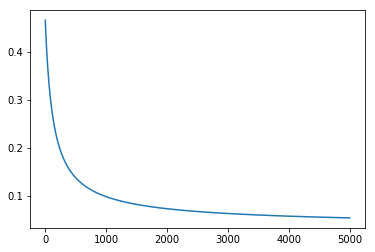

In [24]:
plt.plot(losses)

In [25]:
# the weights
session.run(w, feed_dict = feed_dict)

array([[-2.148312 ],
       [ 5.1075234],
       [-8.2439375]], dtype=float32)

make a tensor to calculate the average accuracy: 
\begin{equation*}
A = \frac{1}{n}\sum_{i}y_{i}\equiv \tilde{y}_{i}
\end{equation*}

In [26]:
prediction = tf.cast(y_tilde >= 0.5, tf.float32)
accuracy = tf.reduce_mean(
    tf.cast(tf.equal(prediction, Y), tf.float32))
session.run(accuracy, feed_dict = feed_dict)

0.99

In [28]:
writer = tf.summary.FileWriter("logs", session.graph)